In [1]:
import sys
sys.path.append(r"../tools/") 

from observer import ukf

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.linalg import block_diag
import pickle
from os import path
import sys

In [3]:
filename = 'result_step1_FLOW.pckl'
infile = open(filename,'rb')
flow = pickle.load(infile)
infile.close()

filename = 'result_step1_LEVEL.pckl'
infile = open(filename,'rb')
level = pickle.load(infile)
infile.close()

filename = 'result_step2_SIGNAL_UNSAT.pckl'
infile = open(filename,'rb')
signal = pickle.load(infile)
infile.close()

filename = 'result_step2_SIGNAL_BIAS.pckl'
infile = open(filename,'rb')
X0 = pickle.load(infile)
infile.close() 

In [4]:
lambda1 = 0
lambda2 = 2
lambda3 = 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


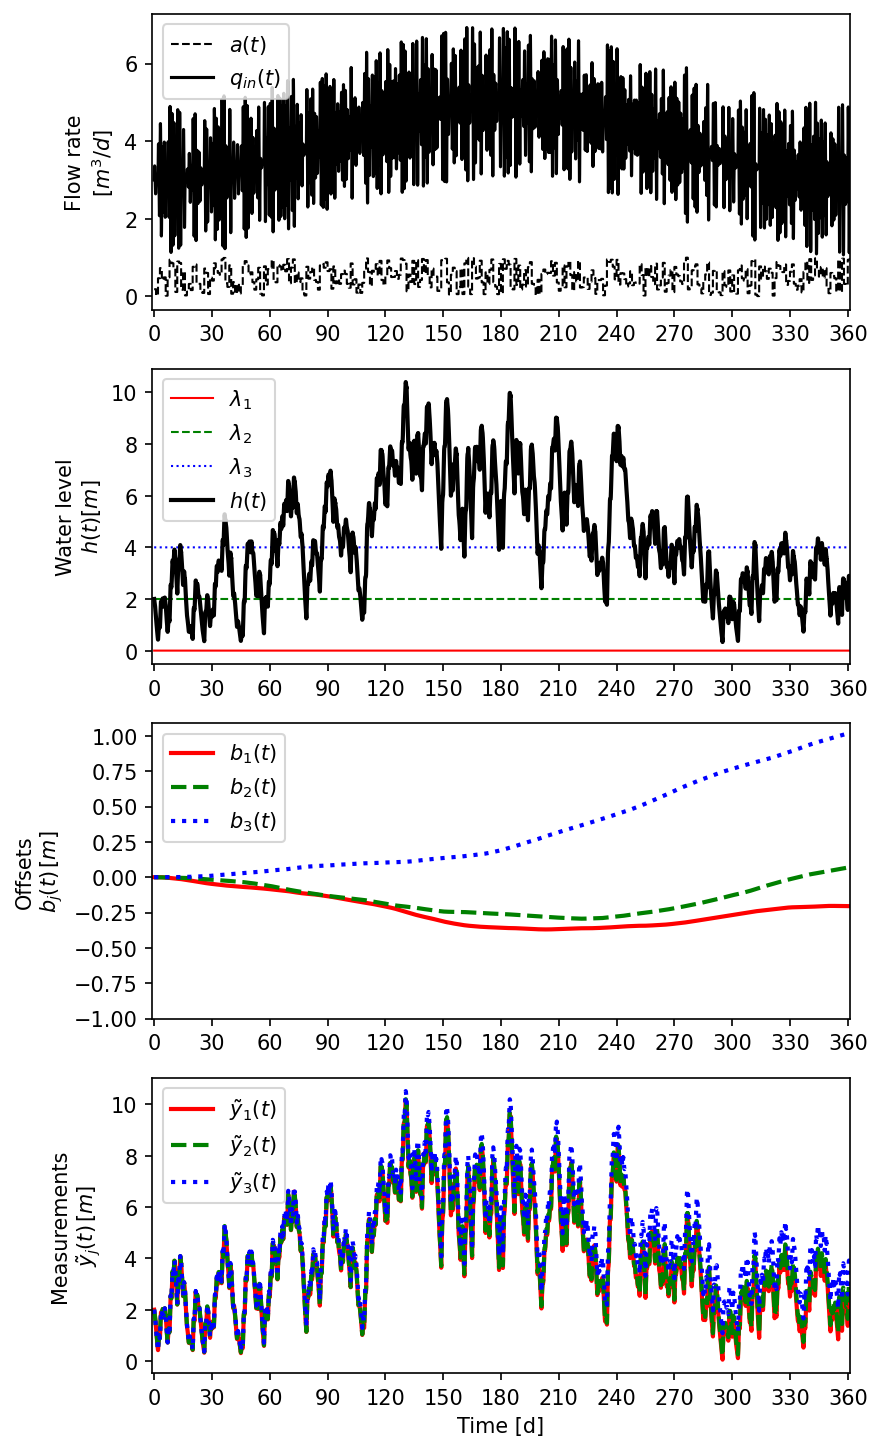

In [5]:
fig, axs = plt.subplots(4,1,figsize=(6,12),dpi=150)

ax = axs[0]
ax.step(flow[:,0],flow[:,1],'k--',label='$a(t)$',lw=1)
ax.plot(flow[:,0],flow[:,2],'k-',label='$q_{in}(t)$');
ax.set_ylabel('Flow rate\n$[m^3/d]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[1]
ax.plot(level[:,0],level[:,1]*0+lambda1,'r-',label='$\lambda_1$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda2,'g--',label='$\lambda_2$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda3,'b:',label='$\lambda_3$',lw=1);
ax.plot(level[:,0],level[:,1],'k-',label='$h(t)$',lw=2);
ax.set_ylabel('Water level\n$h(t) [m]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[2]
ax.plot(signal[:,0],X0[:,0]/1000,'r-',label='${b}_1(t)$',lw=2);
ax.plot(signal[:,0],X0[:,1]/1000,'g--',label='${b}_2(t)$',lw=2);
ax.plot(signal[:,0],X0[:,2]/1000,'b:',label='${b}_3(t)$',lw=2);
ax.set_ylabel('Offsets\n$b_j(t) \, [m]$')
ax.legend(loc='upper left')
ax.set_yticks(np.arange(-1,1.1,0.25));
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[3]
ax.plot(signal[:,0],signal[:,1]/1000,'r-',label='$\~{y}_1(t)$',lw=2);
ax.plot(signal[:,0],signal[:,2]/1000,'g--',label='$\~{y}_2(t)$',lw=2);
ax.plot(signal[:,0],signal[:,3]/1000,'b:',label='$\~{y}_3(t)$',lw=2);
ax.legend(loc='upper left')
ax.set_ylabel('Measurements\n$\~{y}_j(t) \, [m]$')
ax.set_xlabel('Time [d]')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

fig.savefig('./figure/simulation_C.eps',bbox_inches='tight');
fig.savefig('./figure/simulation_C.tiff',bbox_inches='tight');

# Initialize and run UKF

In [6]:
# Observer model parameters
A = 1
B = 100 
gamma = 1 #250/360*np.sqrt(0.01)
sigma = 1

In [7]:

n = signal.shape[0]
y_ = signal[:n,1:] 
u=0
ffun_UKF = lambda xa, u: np.array([A*xa[0]+B*xa[1]])
hfun_UKF = lambda xa, u: np.array([xa[0]])+sigma*xa[2:]
Lx = 1
Ly = 3
ukf0 = ukf(ffun=ffun_UKF,hfun=hfun_UKF,Lx=Lx,Ly=Ly,Lv=Lx,Lw=Ly,alpha=1,beta=0,kappa=[])
ukf0.reset()

xbar_ = []
sigmaxbar_ = []

ukf0.reset(xbar = np.array([2000])[:,None],Pbar=np.eye(Lx) )

for index,ym in enumerate(y_):
    
    ukf0.update(u=u,ytil=ym)
    
    xbar_.append(ukf0.xbar[:,0])
    sigmaxbar_.append(np.diag(ukf0.Pbar)**(1/2))
    pass


5


In [8]:
tdelta = level[1,0]-level[0,0]
xbar_ = np.array(xbar_)
sigmaxbar_ = np.array(sigmaxbar_)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


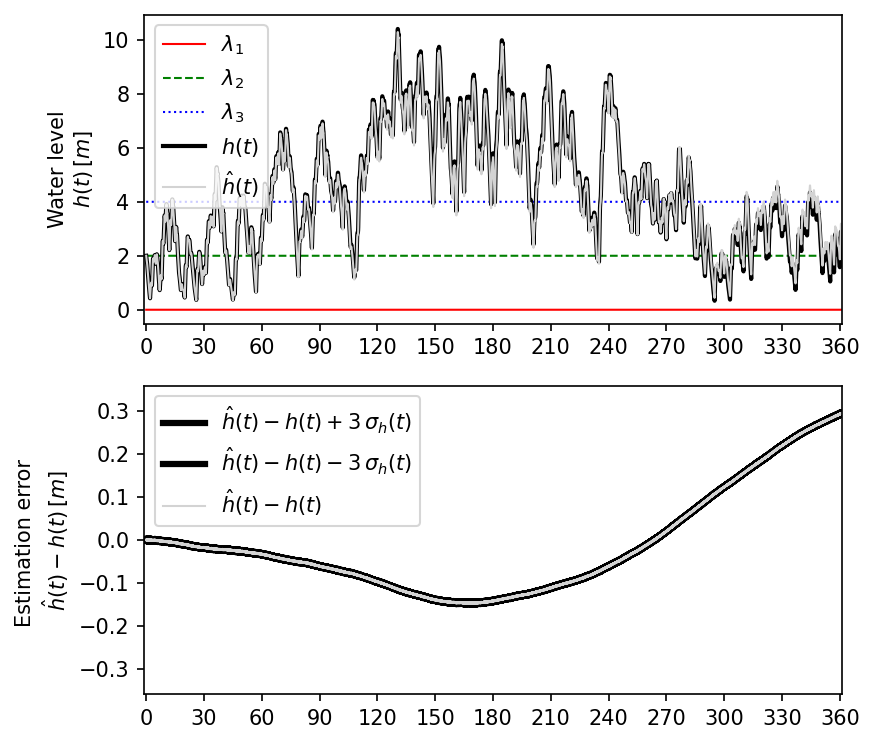

In [9]:
fig, axs = plt.subplots(2,1,figsize=(6,6),dpi=150)

ax = axs[0]
ax.plot(level[:,0],level[:,1]*0+lambda1,'r-',label='$\lambda_1$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda2,'g--',label='$\lambda_2$',lw=1);
ax.plot(level[:,0],level[:,1]*0+lambda3,'b:',label='$\lambda_3$',lw=1);
ax.plot(level[:,0],level[:,1],'k-',label='$h(t)$',lw=2);
ax.plot(signal[:,0],(xbar_[:,0])/1000,'-',label='$\hat{h}(t)$',lw=1,color='lightgrey');
ax.set_ylabel('Water level\n$h(t)\, [m]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,361])
ax.set_xticks(np.arange(0,361,30));

ax = axs[1]
ax.plot(signal[:,0],(xbar_[:,0]+3*sigmaxbar_[:,0])/1000-level[:,1],'-',label='$\hat{h}(t)-h(t)+3\,\sigma_{h}(t)$',lw=3,color='black');
ax.plot(signal[:,0],(xbar_[:,0]-3*sigmaxbar_[:,0])/1000-level[:,1],'-',label='$\hat{h}(t)-h(t)-3\,\sigma_{h}(t)$',lw=3,color='black');
ax.plot(signal[:,0],(xbar_[:,0])/1000-level[:,1],'-',color= 'lightgrey',label='$\hat{h}(t)-h(t)$',lw=1);
ax.set_ylabel('Estimation error \n$\hat{h}(t)-h(t)\, [m]$')
ax.legend(loc='upper left')
ax.set_xlim([-1,361])
ax.set_ylim([-0.36,0.36])
ax.set_yticks(np.arange(-0.3,0.4,0.1));
ax.set_xticks(np.arange(0,361,30));

fig.savefig('./figure/observer_scenarioC.eps',bbox_inches='tight');
fig.savefig('./figure/observer_scenarioC.tiff',bbox_inches='tight');